In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

train_dir = './dataset_train'
test_dir = './dataset_test'
batch_size = 32
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

# Define the data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255) # rescale the pixel values between 0 and 1

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # path to the training dataset
        target_size=(img_height, img_width), # resize images to this size
        batch_size=batch_size,
        class_mode='categorical') # output class labels as one-hot vectors

test_generator = test_datagen.flow_from_directory(
        test_dir,  # path to the testing dataset
        target_size=(img_height, img_width),
        batch_size=1, # batch size of 1 to test one image at a time
        class_mode='categorical')

# Check the mapping of labels to class indices
print(train_generator.class_indices)


Found 1123 images belonging to 4 classes.
Found 134 images belonging to 4 classes.
{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}


In [4]:
# Create the CNN model
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
        train_generator,
        epochs=10,
        steps_per_epoch=train_generator.samples // batch_size)

# Save the model
model.save('weather_classification_without_preprocessing.h5')


Epoch 1/10
35/35 [==============================] - 141s 4s/step - loss: 2.0944 - accuracy: 0.4088
Epoch 2/10
35/35 [==============================] - 148s 4s/step - loss: 0.9461 - accuracy: 0.6196
Epoch 3/10
35/35 [==============================] - 149s 4s/step - loss: 0.7128 - accuracy: 0.7177
Epoch 4/10
35/35 [==============================] - 147s 4s/step - loss: 0.5162 - accuracy: 0.8048
Epoch 5/10
35/35 [==============================] - 150s 4s/step - loss: 0.4377 - accuracy: 0.8451
Epoch 6/10
35/35 [==============================] - 150s 4s/step - loss: 0.3983 - accuracy: 0.8579
Epoch 7/10
35/35 [==============================] - 146s 4s/step - loss: 0.3215 - accuracy: 0.8790
Epoch 8/10
35/35 [==============================] - 145s 4s/step - loss: 0.2607 - accuracy: 0.9093
Epoch 9/10
35/35 [==============================] - 150s 4s/step - loss: 0.2272 - accuracy: 0.9093
Epoch 10/10
35/35 [==============================] - 141s 4s/step - loss: 0.2132 - accuracy: 0.9303


In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

134/134 [==============================] - 13s 93ms/step - loss: 0.0859 - accuracy: 0.9776
Test loss: 0.0859418660402298
Test accuracy: 0.9776119589805603


1/1 [==============================] - 1s 1s/step
Predicted class: rainy


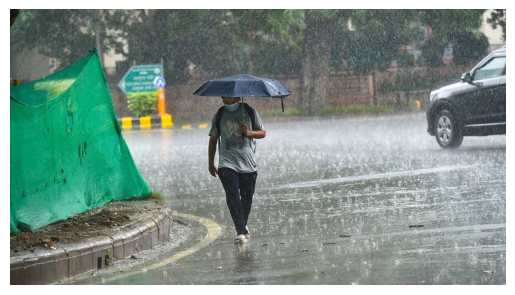

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = 'test_image.jpg'
img_height, img_width = 224, 224
# Load the test image
img = load_img(img_path, target_size=(img_height, img_width))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.

# Predict the class of the test image
preds = model.predict(x)
pred_class = np.argmax(preds, axis=1)[0]

# Print the predicted class and corresponding label
class_labels = {0: 'cloudy', 1: 'rainy', 2: 'shine', 3: 'sunrise'}
print('Predicted class:', class_labels[pred_class])

#read the image
image=mpimg.imread(img_path)
plt.axis('off')
plt.imshow(image)


1/1 [==============================] - 1s 943ms/step
Predicted class: shine


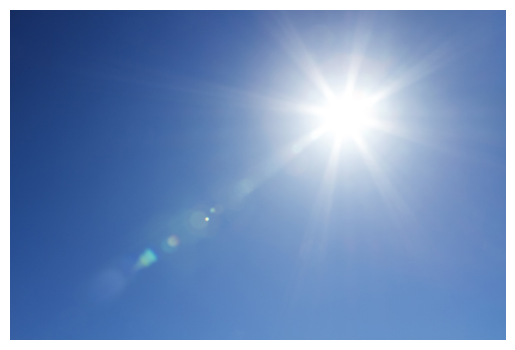

In [12]:
img_path = 'test_image2.jpg'
img_height, img_width = 224, 224
# Load the test image
img = load_img(img_path, target_size=(img_height, img_width))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.

# Predict the class of the test image
preds = model.predict(x)
pred_class = np.argmax(preds, axis=1)[0]

print('Predicted class:', class_labels[pred_class])

#read the image
image=mpimg.imread(img_path)
plt.axis('off')
plt.imshow(image)


1/1 [==============================] - 1s 984ms/step
Predicted class: sunrise


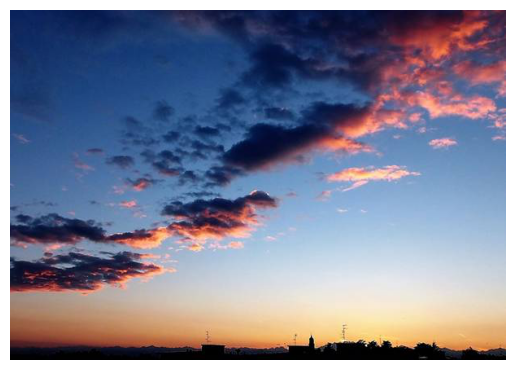

In [13]:
img_path = 'test_image3.jpg'
img_height, img_width = 224, 224
# Load the test image
img = load_img(img_path, target_size=(img_height, img_width))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.

# Predict the class of the test image
preds = model.predict(x)
pred_class = np.argmax(preds, axis=1)[0]

print('Predicted class:', class_labels[pred_class])

#read the image
image=mpimg.imread(img_path)
plt.axis('off')
plt.imshow(image)

